In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3

In [2]:
pip install sqlalchemy



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pyodbc


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sqlalchemy import create_engine
import pyodbc
#engine=pyodbc.connect('mssql+pyodbc://CVIADPNFD03/SiteMonitor/?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server')

cnxn = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='CVIADPNFD03',
    Database='SiteMonitor'
)

In [5]:
engine=create_engine('mssql+pyodbc://CVIADPNFD03/SiteMonitor?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')

In [6]:
df=pd.read_sql("select batch_id,site.url,report.site_id,report.credential_id,report.is_working,report.created_at from report inner join	site on Report.site_id=Site.id",con=engine)
#df.drop(['id','screenshot_url'],axis=1)

In [7]:
df.info()
df[df['is_working']==0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222168 entries, 0 to 222167
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   batch_id       222168 non-null  object        
 1   url            222168 non-null  object        
 2   site_id        222168 non-null  int64         
 3   credential_id  222168 non-null  int64         
 4   is_working     222168 non-null  bool          
 5   created_at     222168 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 8.7+ MB


,batch_id,url,site_id,credential_id,is_working,created_at
0,10312022085733,https://nextgen.shareablee.com/,4,1,False,2022-10-31 08:58:23.763
7,10312022090928,https://my.comscore.com/,10,1,False,2022-10-31 09:13:33.570
18,10312022090928,https://my.comscore.com/,10,2,False,2022-10-31 09:20:17.573
4862,11072022030007,https://nextgen.shareablee.com/,4,1,False,2022-11-07 03:02:21.220
4873,11072022030007,https://nextgen.shareablee.com/,4,2,False,2022-11-07 03:08:44.503
...,...,...,...,...,...,...
221915,06082023094009,https://tv.comscore.com,11,1,False,2023-06-08 21:43:49.770
221916,06082023094009,https://mymetrix.comscore.com/app/report.aspx,12,1,False,2023-06-08 21:44:23.433
221917,06082023094009,https://ratings.comscore.com/,13,1,False,2023-06-08 21:44:58.813
221918,06082023094009,https://direct.comscore.com/,14,1,False,2023-06-08 21:45:32.227


In [8]:
df['created_at']=pd.to_datetime(df['created_at'].dt.date)
df['created_at']

0        2022-10-31
1        2022-10-31
2        2022-10-31
3        2022-10-31
4        2022-10-31
            ...    
222163   2023-06-09
222164   2023-06-09
222165   2023-06-09
222166   2023-06-09
222167   2023-06-09
Name: created_at, Length: 222168, dtype: datetime64[ns]

In [9]:
df['is_working']=df['is_working'].astype(int)

In [21]:
#df.groupby(['batch_id','site_id','credential_id'])['is_working'].size()
df[(df['is_working']==0) & (df['credential_id']==1)]
#df=df.sort_values('created_at',ascending=False).copy()
#df['batch_id'].values[1]
#df['batch_id'].max()
#df[df['batch_id']=='11072022030007']

,batch_id,url,site_id,credential_id,is_working,created_at
0,10312022085733,https://nextgen.shareablee.com/,4,1,0,2022-10-31
7,10312022090928,https://my.comscore.com/,10,1,0,2022-10-31
4862,11072022030007,https://nextgen.shareablee.com/,4,1,0,2022-11-07
4884,11072022033009,https://nextgen.shareablee.com/,4,1,0,2022-11-07
4906,11072022040006,https://nextgen.shareablee.com/,4,1,0,2022-11-07
...,...,...,...,...,...,...
221915,06082023094009,https://tv.comscore.com,11,1,0,2023-06-08
221916,06082023094009,https://mymetrix.comscore.com/app/report.aspx,12,1,0,2023-06-08
221917,06082023094009,https://ratings.comscore.com/,13,1,0,2023-06-08
221918,06082023094009,https://direct.comscore.com/,14,1,0,2023-06-08


In [22]:
def todaysreport(df):
    #sorting the data as per teh date 
    df=df.sort_values('created_at',ascending=False).copy()
    df_today=df.loc[df['batch_id']== df['batch_id'].values[1],:]
    df_today=df_today.drop('created_at',axis=1)
    return df_today
    
    

In [24]:
df_today=todaysreport(df)
#df_today.groupby(['credential_id','site_id']).is_working.sum().unstack().plot.bar()
df_today.sort_values('site_id')
print('most recent batch data')

most recent batch data


In [25]:
#converting credentialvalues to internal and external

def internal_external(x):
    if x==1:
        return 'Internal'
    else:
        return "External"
    
    
    

In [26]:
df_today['credential_id']=df_today['credential_id'].apply(internal_external)

<Axes: xlabel='sites to be monitor', ylabel='working Staus'>

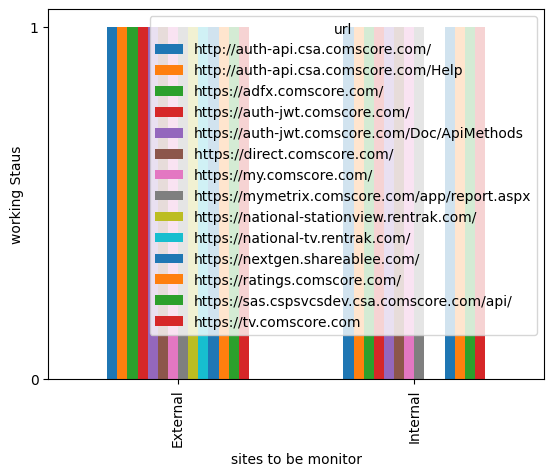

In [27]:
df_today.groupby(['credential_id','url']).is_working.sum().unstack().plot.bar(width=0.6,xlabel='sites to be monitor',ylabel='working Staus',yticks=(0,1))


<Axes: title={'center': 'External logins'}, ylabel='count'>

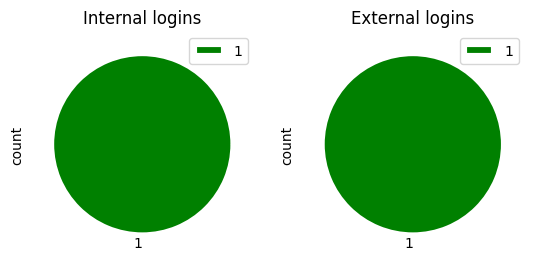

In [28]:
df_today_internal= df_today[df_today['credential_id']=='Internal']
df_today_internal['is_working'].value_counts().reset_index().set_index('is_working')

fig,(ax1,ax2)=plt.subplots(1,2)
fig=(5,5)
colditc={'0':'red','1':'green'}
ax1.set_title('Internal logins')
labels=['1','0']
df_today_internal['is_working'].value_counts().reset_index().set_index('is_working').plot(kind='pie',y='count',ax=ax1,colors=[colditc[key] for key in labels],labels=labels,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },startangle=90)
#df_today_internal['is_working'].value_counts()

ax2.set_title('External logins')
df_today_External= df_today[df_today['credential_id']=='External']
df_today_External['is_working'].value_counts().reset_index().set_index('is_working').plot(kind='pie',ax=ax2,y='count',colors=[colditc[key] for key in labels],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },labels=labels,startangle=90)



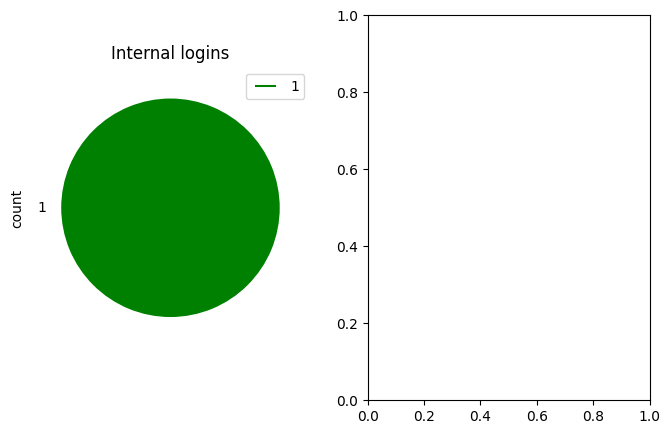

In [29]:
from matplotlib.patches import ConnectionPatch
df_today_internal= df_today[df_today['credential_id']=='Internal']
df_today_internal['is_working'].value_counts().reset_index().set_index('is_working')

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#ratios = [.5, .7]
angle = 180 * (len(df_today_internal[df_today_internal['is_working']==0])/len(df_today_internal))
explode = [0.05, 0.05]



ax1.set_title('Internal logins')
df_today_internal['is_working'].value_counts().reset_index().set_index('is_working').plot(kind='pie',y='count',ax=ax1,colors=[colditc[key] for key in labels],wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' },
                                                                                          startangle=angle,labels=labels)
if len(df_today_internal[df_today_internal['is_working']==0])>1:
       
        ax2.set_title("Sites")

        colors=["#0000FF", "green","#808080","#800080"]
        df_today_internal[df_today_internal['is_working']==0].groupby('url').value_counts().reset_index().set_index('site_id').plot(kind='pie',y='count',ax=ax2,colors=colors
                                                                                                  ,radius=0.6, textprops={'size': 'smaller'})
        width=.8

        # use ConnectionPatch to draw lines between the two plots
        # get the wedge data
        theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
        center, r = ax1.patches[0].center, ax1.patches[0].r

        # draw top connecting line
        x = r * np.cos(np.pi / 180 * theta2) + center[0]
        y = np.sin(np.pi / 180 * theta2) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                              coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
        con.set_color([0, 0, 0])
        con.set_linewidth(1)
        ax2.add_artist(con)

        # draw bottom connecting line
        x = r * np.cos(np.pi / 180 * theta1) + center[0]
        y = np.sin(np.pi / 180 * theta1) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                              coordsB="data", axesA=ax2, axesB=ax1)
        con.set_color([0, 0, 0])
        ax2.add_artist(con)
        con.set_linewidth(2)


In [30]:
len(df_today_internal[df_today_internal['is_working']==0])>1

False

In [31]:
def piecharts(df,chart_type):
    from matplotlib.patches import ConnectionPatch
    df_chart_type= df_today[df_today['credential_id']==chart_type]
    df_chart_type['is_working'].value_counts().reset_index().set_index('is_working')
    
    if len(df_chart_type[df_chart_type['is_working']==0]) > 1:
        fig=plt.figure(figsize=(11,11))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax2.set_title("Sites")
        angle = 180 * (len(df_chart_type[df_chart_type['is_working']==0])/len(df_chart_type))
        explode = [0.05, 0.05]

        ax1.set_title(chart_type + "Login")
        df_chart_type['is_working'].value_counts().reset_index().set_index('is_working').plot(kind='pie',y='count',ax=ax1,colors=[colditc[key] for key in labels],wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' },
                                                                                                      startangle=angle,labels=labels)




        colors=["#0000FF", "green","#808080","#800080"]
        df_chart_type[df_chart_type['is_working']==0].groupby('url').value_counts().reset_index().set_index('url').plot(kind='pie',y='count',ax=ax2,colors=colors
                                                                                                              ,radius=0.6,textprops={'fontsize': 6})
        width=.8
        #ax2.legend(loc='lower right',fontsize="8")
        ax2.get_legend().remove()

        # use ConnectionPatch to draw lines between the two plots
        # get the wedge data
        theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
        center, r = ax1.patches[0].center, ax1.patches[0].r

        # draw top connecting line
        x = r * np.cos(np.pi / 180 * theta2) + center[0]
        y = np.sin(np.pi / 180 * theta2) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                              coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
        con.set_color([0, 0, 0])
        con.set_linewidth(1)
        ax2.add_artist(con)

        # draw bottom connecting line
        x = r * np.cos(np.pi / 180 * theta1) + center[0]
        y = np.sin(np.pi / 180 * theta1) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                              coordsB="data", axesA=ax2, axesB=ax1)
        con.set_color([0, 0, 0])
        ax2.add_artist(con)
        con.set_linewidth(2)
    else:
        fig=plt.figure(figsize=(8,5))
        ax1 = fig.add_subplot(121)
        
        angle = 180 * (len(df_chart_type[df_chart_type['is_working']==0])/len(df_chart_type))
        explode = [0.05, 0.05]

        ax1.set_title(chart_type + " Login")
        df_chart_type['is_working'].value_counts().reset_index().set_index('is_working').plot(kind='pie',y='count',ax=ax1,colors=[colditc[key] for key in labels],wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' },
                                                                                                      startangle=angle,labels=labels)
    
    
    

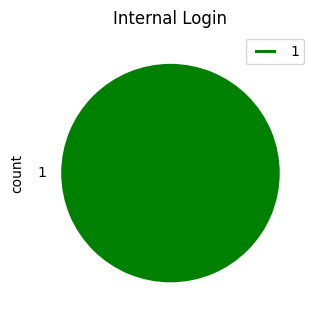

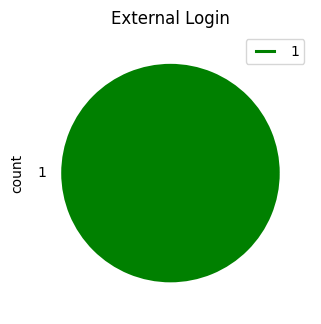

In [32]:
piecharts(df_today[df_today['credential_id']=='Internal'],'Internal')
piecharts(df_today[df_today['credential_id']=='External'],'External')
